# Titanic Survival Prediction

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

The aimm of this work is to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np

#### Load Train and Test Dataset

In [2]:
train_data = pd.read_csv('./dataset/train.csv')
test_data = pd.read_csv('./dataset/test.csv')

print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
null_columns = train_data.columns[train_data.isnull().any()]
null_columns

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

Text(0.5, 1.0, 'Variables with missing values')

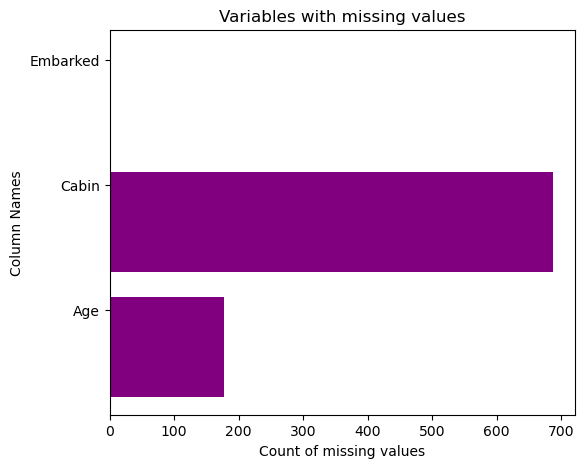

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = []
values = []

for col in null_columns:
    labels.append(col)
    values.append(train_data[col].isnull().sum())

ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values")

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

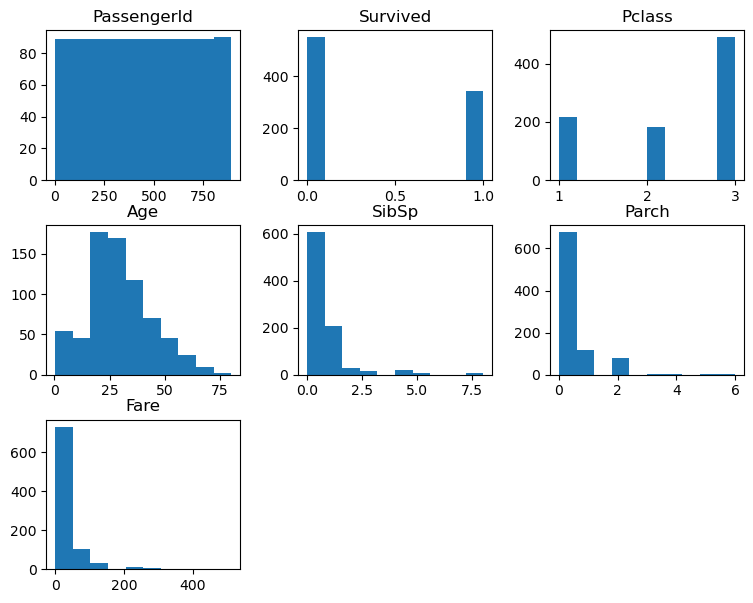

In [11]:
train_data.hist(bins=10,figsize=(9,7),grid=False)


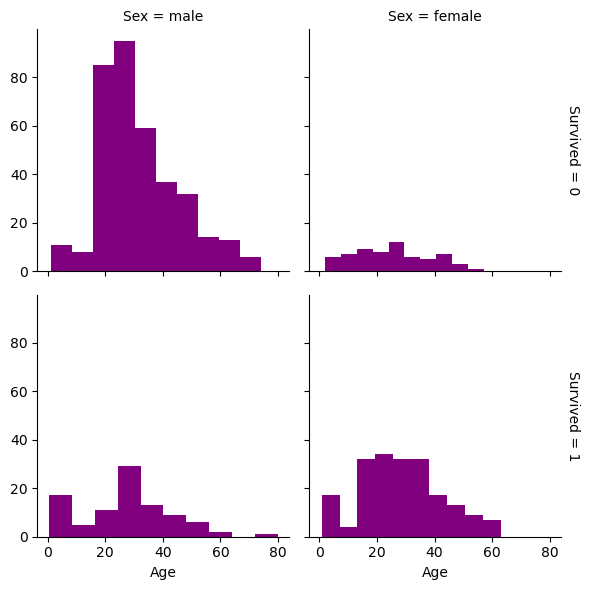

In [12]:
g = sns.FacetGrid(train_data, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

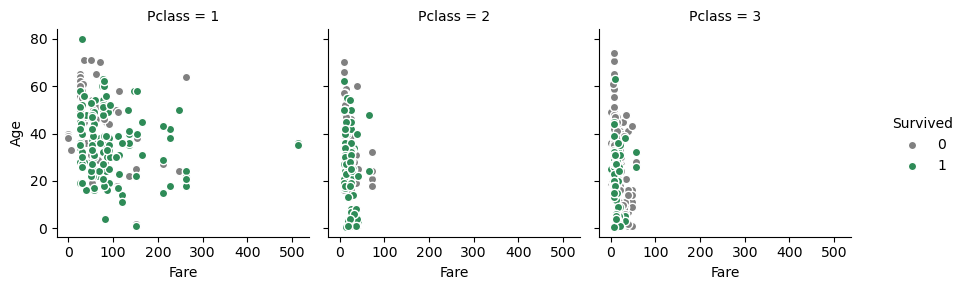

In [13]:
g = sns.FacetGrid(train_data, hue="Survived", col = "Pclass", margin_titles=True, palette={1:"seagreen", 0:"gray"})
g.map(plt.scatter, "Fare","Age",edgecolor="w").add_legend();

Most of the survivors are from younger passengers in pclass 1 and 2

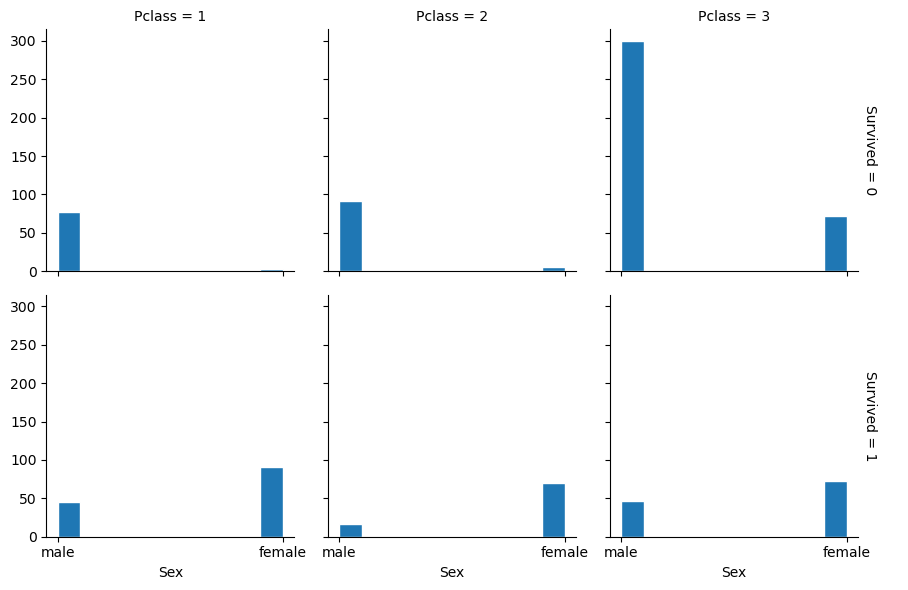

In [14]:
g = sns.FacetGrid(train_data, row="Survived", col = "Pclass", margin_titles=True, palette={1:"seagreen", 0:"gray"})
g.map(plt.hist, "Sex",edgecolor="w").add_legend();

Almost all female in pclass1 and pclass2 survived

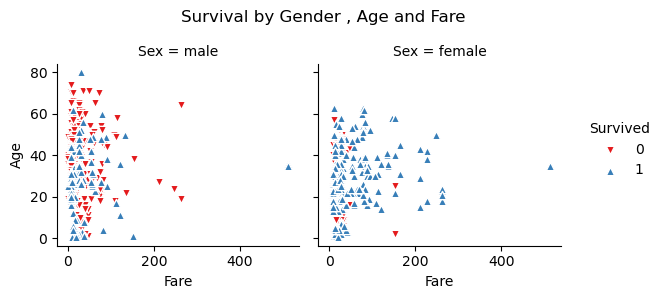

In [15]:
g = sns.FacetGrid(train_data, hue="Survived", col="Sex", margin_titles=True, 
                  palette="Set1", hue_kws=dict(marker = ["v", "^"]))
g.map(plt.scatter, "Fare", "Age" ,edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');

#### Passenger per boarding location

Text(0.5, 1.0, 'Passengers per boarding location')

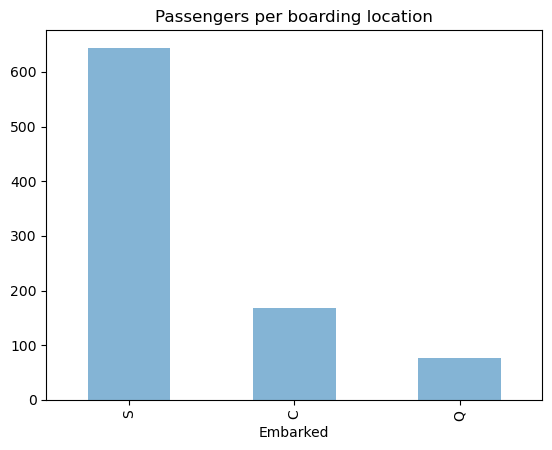

In [16]:
train_data.Embarked.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Passengers per boarding location")

/tmp/ipykernel_4572/2410419850.py:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(x="Survived", y="Age",


AttributeError: module 'seaborn' has no attribute 'plt'

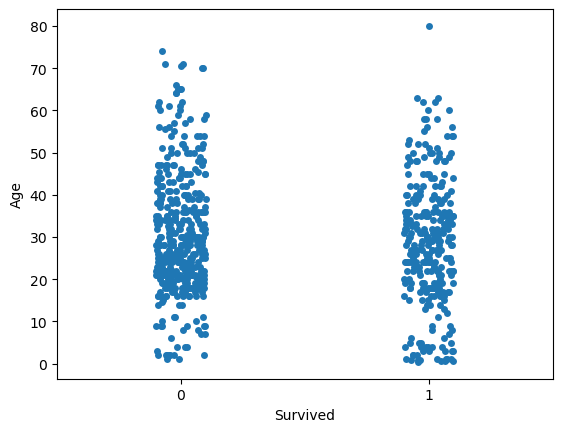

In [17]:
# ax = sns.boxplot(x="Survived", y="Age", 
#                 data=train_data)
ax = sns.stripplot(x="Survived", y="Age",
                   data=train_data, jitter=True,
                   edgecolor="gray")
sns.plt.title("Survival by Age",fontsize=12);

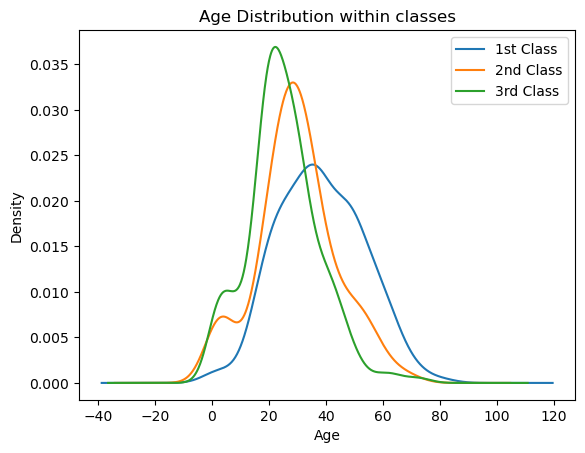

In [18]:
train_data.Age[train_data.Pclass == 1].plot(kind="kde")
train_data.Age[train_data.Pclass == 2].plot(kind="kde")
train_data.Age[train_data.Pclass == 3].plot(kind="kde")

plt.xlabel('Age')
plt.title("Age Distribution within classes")

plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')

In [19]:
train_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


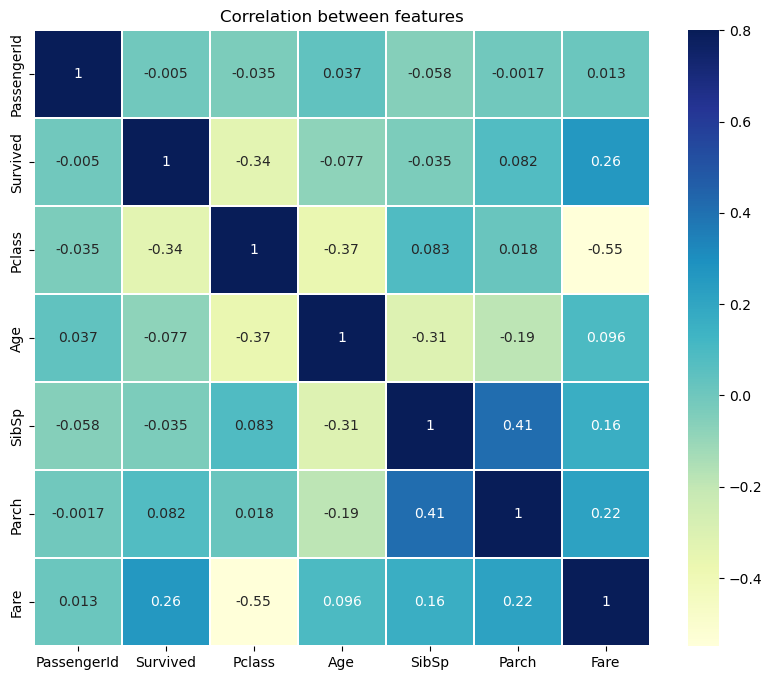

In [20]:
train_data_corr = train_data.drop(columns=["Name", "Sex", "Ticket", "Embarked", "Cabin"])

corr = train_data_corr.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmax=.8, linewidths=.01, square=True, annot=True, cmap='YlGnBu',linecolor="White")
plt.title('Correlation between features');

In [21]:
corr.Survived

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

#### Fill out missing values

In [23]:
train_data[train_data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

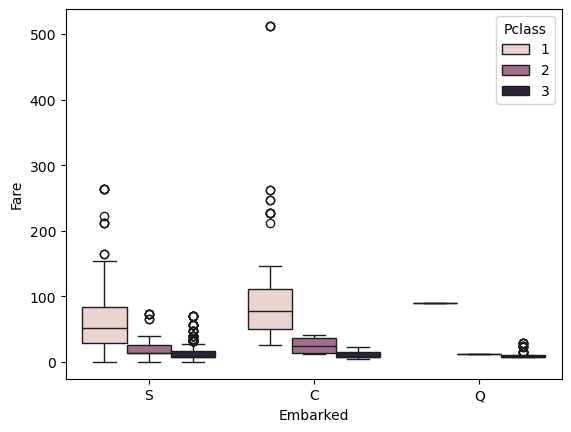

In [24]:
sns.boxplot(x = "Embarked", y="Fare", hue="Pclass", data=train_data)

We can see that for 1st class median line is coming around fare $80 for embarked value 'C'. So we can replace NA values in Embarked column with 'C'

In [25]:
train_data.Embarked = train_data.Embarked.fillna('C')
train_data.Embarked.isnull().sum()

0

In [26]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [27]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [28]:
test_data[test_data.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [29]:
def fill_missing_fare(data):
    median_val = data.Fare[(data.Embarked == 'S') & (data.Pclass == 3)].median()
    print("median_val >> ", median_val)

    data.Fare = data.Fare.fillna(median_val)
    return data


In [30]:
test_data = fill_missing_fare(test_data)
test_data[test_data.Fare.isnull()]

median_val >>  8.05


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Feature Engineering

In [31]:
train_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [51]:
train_data['Deck'] = train_data.Cabin.str[0]
test_data['Deck'] = test_data.Cabin.str[0]

train_data['Deck'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [52]:
train_data['Deck'].fillna('Z', inplace=True)
test_data['Deck'].fillna('Z', inplace=True)

train_data['Deck'].unique()

/tmp/ipykernel_4572/813118792.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Deck'].fillna('Z', inplace=True)
/tmp/ipykernel_4572/813118792.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

#### Check how big a family is

In [53]:
train_data['FamilySize'] = train_data.SibSp + train_data.Parch + 1
test_data['FamilySize'] = test_data.SibSp + test_data.Parch + 1
train_data['FamilySize'].value_counts()

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [54]:
train_data.loc[train_data["FamilySize"] == 1, "FSizeD"] = 'singleton'
train_data.loc[(train_data["FamilySize"] > 1) & (train_data["FamilySize"] < 5), "FSizeD"] = 'small'
train_data.loc[(train_data["FamilySize"] > 4), "FSizeD"] = 'large'

test_data.loc[test_data["FamilySize"] == 1, "FSizeD"] = 'singleton'
test_data.loc[(test_data["FamilySize"] > 1) & (test_data["FamilySize"] < 5), "FSizeD"] = 'small'
test_data.loc[(test_data["FamilySize"] > 4), "FSizeD"] = 'large'

print(train_data.FSizeD.unique())
print(train_data.FSizeD.value_counts())

['small' 'singleton' 'large']
FSizeD
singleton    537
small        292
large         62
Name: count, dtype: int64


/tmp/ipykernel_4572/2632434089.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'singleton' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data.loc[train_data["FamilySize"] == 1, "FSizeD"] = 'singleton'
/tmp/ipykernel_4572/2632434089.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'singleton' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_data.loc[test_data["FamilySize"] == 1, "FSizeD"] = 'singleton'


Consider the effect of Name Length

In [55]:
train_data['NameLength'] = train_data.Name.apply(lambda x: len(x))
test_data['NameLength'] = test_data.Name.apply(lambda x: len(x))

In [56]:
bins = [0, 20, 40, 57, 85]
group_names = ['short', 'okay', 'good', 'long']

train_data['NlengthD'] = pd.cut(train_data['NameLength'], bins, labels=group_names)
test_data['NlengthD'] = pd.cut(test_data['NameLength'], bins, labels=group_names)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FSizeD,NameLength,NlengthD,Title,TicketNumber,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,small,23,okay,2,21171.0,Z
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2,small,51,good,3,17599.0,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,singleton,22,okay,1,3101282.0,Z
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2,small,44,good,3,113803.0,C
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,1,singleton,24,okay,2,373450.0,Z


What's in the name

In [57]:
import re

#A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    #If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

#Get all the titles and print how often each one occurs.
titles = train_data["Name"].apply(get_title)
print(pd.value_counts(titles))

Name
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


/tmp/ipykernel_4572/3368620686.py:14: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(titles))


In [58]:
#Add in the title column.
train_data["Title"] = titles

# Titles with very low cell counts to be combined to "rare" level
rare_title = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

# Also reassign mlle, ms, and mme accordingly
train_data.loc[train_data["Title"] == "Mlle", "Title"] = 'Miss'
train_data.loc[train_data["Title"] == "Ms", "Title"] = 'Miss'
train_data.loc[train_data["Title"] == "Mme", "Title"] = 'Mrs'
train_data.loc[train_data["Title"] == "Dona", "Title"] = 'Rare Title'
train_data.loc[train_data["Title"] == "Lady", "Title"] = 'Rare Title'
train_data.loc[train_data["Title"] == "Countess", "Title"] = 'Rare Title'
train_data.loc[train_data["Title"] == "Capt", "Title"] = 'Rare Title'
train_data.loc[train_data["Title"] == "Col", "Title"] = 'Rare Title'
train_data.loc[train_data["Title"] == "Don", "Title"] = 'Rare Title'
train_data.loc[train_data["Title"] == "Major", "Title"] = 'Rare Title'
train_data.loc[train_data["Title"] == "Rev", "Title"] = 'Rare Title'
train_data.loc[train_data["Title"] == "Sir", "Title"] = 'Rare Title'
train_data.loc[train_data["Title"] == "Jonkheer", "Title"] = 'Rare Title'
train_data.loc[train_data["Title"] == "Dr", "Title"] = 'Rare Title'

train_data["Title"].value_counts()

Title
Mr            517
Miss          185
Mrs           126
Master         40
Rare Title     23
Name: count, dtype: int64

In [40]:
# for test data

test_titles = test_data["Name"].apply(get_title)
print(pd.value_counts(test_titles))

#Add in the title column.
test_data["Title"] = test_titles

# test_Titles with very low cell counts to be combined to "rare" level
rare_title = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

# Also reassign mlle, ms, and mme accordingly
test_data.loc[test_data["Title"] == "Mlle", "Title"] = 'Miss'
test_data.loc[test_data["Title"] == "Ms", "Title"] = 'Miss'
test_data.loc[test_data["Title"] == "Mme", "Title"] = 'Mrs'
test_data.loc[test_data["Title"] == "Dona", "Title"] = 'Rare Title'
test_data.loc[test_data["Title"] == "Lady", "Title"] = 'Rare Title'
test_data.loc[test_data["Title"] == "Countess", "Title"] = 'Rare Title'
test_data.loc[test_data["Title"] == "Capt", "Title"] = 'Rare Title'
test_data.loc[test_data["Title"] == "Col", "Title"] = 'Rare Title'
test_data.loc[test_data["Title"] == "Don", "Title"] = 'Rare Title'
test_data.loc[test_data["Title"] == "Major", "Title"] = 'Rare Title'
test_data.loc[test_data["Title"] == "Rev", "Title"] = 'Rare Title'
test_data.loc[test_data["Title"] == "Sir", "Title"] = 'Rare Title'
test_data.loc[test_data["Title"] == "Jonkheer", "Title"] = 'Rare Title'
test_data.loc[test_data["Title"] == "Dr", "Title"] = 'Rare Title'

test_data["Title"].value_counts()

Name
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


/tmp/ipykernel_4572/2326060476.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(test_titles))


Title
Mr            240
Miss           79
Mrs            72
Master         21
Rare Title      6
Name: count, dtype: int64

Ticket Column

In [59]:
train_data.Ticket.tail()

886        211536
887        112053
888    W./C. 6607
889        111369
890        370376
Name: Ticket, dtype: object

In [60]:
train_data["TicketNumber"] = train_data["Ticket"].str.extract('(\d{2,})', expand=True)
train_data["TicketNumber"] = train_data["TicketNumber"].apply(pd.to_numeric)


test_data["TicketNumber"] = test_data["Ticket"].str.extract('(\d{2,})', expand=True)
test_data["TicketNumber"] = test_data["TicketNumber"].apply(pd.to_numeric)

train_data[train_data["TicketNumber"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FSizeD,NameLength,NlengthD,Title,TicketNumber,Deck
179,180,0,3,"Leonard, Mr. Lionel",1,36.0,0,0,LINE,0.0,NaN,2,1,singleton,19,short,Mr,NaN,Z
271,272,1,3,"Tornquist, Mr. William Henry",1,25.0,0,0,LINE,0.0,NaN,2,1,singleton,28,okay,Mr,NaN,Z
302,303,0,3,"Johnson, Mr. William Cahoone Jr",1,19.0,0,0,LINE,0.0,NaN,2,1,singleton,31,okay,Mr,NaN,Z
597,598,0,3,"Johnson, Mr. Alfred",1,49.0,0,0,LINE,0.0,NaN,2,1,singleton,19,short,Mr,NaN,Z
772,773,0,2,"Mack, Mrs. (Mary)",0,57.0,0,0,S.O./P.P. 3,10.5,E77,2,1,singleton,17,short,Mrs,NaN,E
841,842,0,2,"Mudd, Mr. Thomas Charles",1,16.0,0,0,S.O./P.P. 3,10.5,NaN,2,1,singleton,24,okay,Mr,NaN,Z


In [61]:
train_medium = train_data["TicketNumber"].median()
test_medium = test_data["TicketNumber"].median()

train_data["TicketNumber"].fillna(train_medium, inplace=True)
test_data["TicketNumber"].fillna(test_medium, inplace=True)

/tmp/ipykernel_4572/2992267044.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["TicketNumber"].fillna(train_medium, inplace=True)
/tmp/ipykernel_4572/2992267044.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [62]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FSizeD,NameLength,NlengthD,Title,TicketNumber,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,small,23,okay,Mr,21171.0,Z
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2,small,51,good,Mrs,17599.0,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,singleton,22,okay,Miss,3101282.0,Z
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2,small,44,good,Mrs,113803.0,C
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,1,singleton,24,okay,Mr,373450.0,Z


In [63]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelEnc = LabelEncoder()

cat_vars=['Embarked','Sex',"Title","FSizeD","NlengthD",'Deck']

for col in cat_vars:
    train_data[col] = labelEnc.fit_transform(train_data[col])
    test_data[col] = labelEnc.fit_transform(test_data[col])

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FSizeD,NameLength,NlengthD,Title,TicketNumber,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,2,23,2,2,21171.0,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2,2,51,0,3,17599.0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,1,22,2,1,3101282.0,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2,2,44,0,3,113803.0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,1,1,24,2,2,373450.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2,1,1,21,2,4,211536.0,8
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2,1,1,28,2,1,112053.0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2,4,2,40,2,1,6607.0,8
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0,1,1,21,2,2,111369.0,2


### Fill age column with random forest predictors

/tmp/ipykernel_4572/2310004467.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data.Age.dropna(), bins=80, kde=False, color="red")


AttributeError: module 'seaborn' has no attribute 'plt'

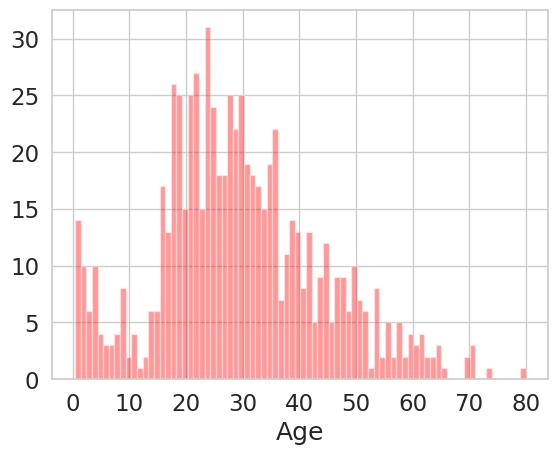

In [66]:
with sns.plotting_context("notebook", font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(train_data.Age.dropna(), bins=80, kde=False, color="red")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")

In [70]:
from sklearn.ensemble import RandomForestRegressor

def fill_missing_age(df):
    #Feature set
    age_df = df[['Age','Embarked','Fare', 'Parch', 'SibSp',
                 'TicketNumber', 'Title','Pclass','FamilySize',
                 'FSizeD','NameLength',"NlengthD",'Deck']]
    
    train = age_df.loc[df.Age.notnull()]

    test = age_df.loc[df.Age.isnull()]

    y = train.values[:, 0]

    X = train.values[: , 1::]

    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)

    predictedAges = rtr.predict(test.values[:, 1::])

    df.loc[df.Age.isnull(), 'Age'] = predictedAges

    return df

In [71]:
train_data = fill_missing_age(train_data)
test_data = fill_missing_age(test_data)

/tmp/ipykernel_4572/3438879733.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data["Age"].dropna(),


AttributeError: module 'seaborn' has no attribute 'plt'

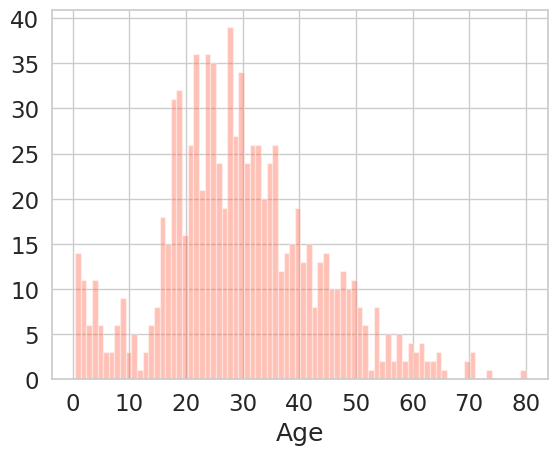

In [76]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(train_data["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100));

### Feature Scaling

In [77]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit(train_data[['Age', 'Fare']])
train_data[['Age', 'Fare']] = std_scale.transform(train_data[['Age', 'Fare']])

In [78]:
std_scale = StandardScaler().fit(test_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = std_scale.transform(test_data[['Age', 'Fare']])

In [84]:
train_data.drop(['Name', 'Ticket'], axis=1, inplace=True)
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,FSizeD,NameLength,NlengthD,Title,TicketNumber,Deck
0,1,0,3,1,-0.561027,1,0,-0.502445,NaN,2,2,2,23,2,2,21171.0,8
1,2,1,1,0,0.601818,1,0,0.786845,C85,0,2,2,51,0,3,17599.0,2
2,3,1,3,0,-0.270316,0,0,-0.488854,NaN,2,1,1,22,2,1,3101282.0,8
3,4,1,1,0,0.383784,1,0,0.420730,C123,2,2,2,44,0,3,113803.0,2
4,5,0,3,1,0.383784,0,0,-0.486337,NaN,2,1,1,24,2,2,373450.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,-0.197638,0,0,-0.386671,NaN,2,1,1,21,2,4,211536.0,8
887,888,1,1,0,-0.779060,0,0,-0.044381,B42,2,1,1,28,2,1,112053.0,1
888,889,0,3,0,-1.474644,1,2,-0.176263,NaN,2,4,2,40,2,1,6607.0,8
889,890,1,1,1,-0.270316,0,0,-0.044381,C148,0,1,1,21,2,2,111369.0,2


In [86]:
test_data.drop(['Name', 'Ticket'], axis=1, inplace=True)
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,FSizeD,NameLength,NlengthD,Title,TicketNumber,Deck
0,892,3,1,0.350737,0,0,-0.497079,NaN,1,1,1,16,3,2,330911.0,7
1,893,3,0,1.304038,1,0,-0.511942,NaN,2,2,2,32,2,3,363272.0,7
2,894,2,1,2.448001,0,0,-0.463770,NaN,1,1,1,25,2,2,240276.0,7
3,895,3,1,-0.221245,0,0,-0.482143,NaN,2,1,1,16,3,2,315154.0,7
4,896,3,0,-0.602565,1,1,-0.417167,NaN,2,3,2,44,0,3,3101298.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,0.986551,0,0,-0.493121,NaN,2,1,1,18,3,2,3236.0,7
414,1306,1,0,0.693925,0,0,1.314552,C105,0,1,1,28,2,4,17758.0,2
415,1307,3,1,0.655793,0,0,-0.507461,NaN,2,1,1,28,2,2,3101262.0,7
416,1308,3,1,-0.245382,0,0,-0.493121,NaN,2,1,1,19,3,2,359309.0,7


In [88]:
train_data.drop(['Cabin'], axis=1, inplace=True)
test_data.drop(['Cabin'], axis=1, inplace=True)

In [89]:
train_data.corr()["Survived"]


PassengerId    -0.005007
Survived        1.000000
Pclass         -0.338481
Sex            -0.543351
Age            -0.078834
SibSp          -0.035322
Parch           0.081629
Fare            0.257307
Embarked       -0.174199
FamilySize      0.016639
FSizeD          0.283810
NameLength      0.332350
NlengthD       -0.312234
Title          -0.071174
TicketNumber   -0.096161
Deck           -0.301116
Name: Survived, dtype: float64

### Linear Regression

In [103]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold, cross_val_score

# The columns we'll use to predict the target
predictors = ["Pclass", "Sex", "Age","SibSp", "Parch", "Fare",
              "Embarked","NlengthD", "FSizeD", "Title","Deck"]

target="Survived"

alg = LinearRegression()

all_predictions = []

kf = KFold(n_splits=5, random_state=1, shuffle=True)
print(kf)
for train, test in kf.split(train_data):

    train_predictors = train_data[predictors].iloc[train, :]
    train_target = train_data[target].iloc[train]

    alg.fit(train_predictors, train_target)

    test_predictions = alg.predict(train_data[predictors].iloc[test, :])

    all_predictions.append(test_predictions)

all_predictions = np.concatenate(all_predictions)

len(all_predictions)

KFold(n_splits=5, random_state=1, shuffle=True)


891

In [104]:
all_predictions[all_predictions > .5] = 1
all_predictions[all_predictions <=.5] = 0


accuracy=sum(train_data["Survived"]==all_predictions)/len(train_data["Survived"])
accuracy

0.5252525252525253

### Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

# The columns we'll use to predict the target
predictors = ["Pclass", "Sex", "Age","SibSp", "Parch", "Fare",
              "Embarked","NlengthD", "FSizeD", "Title","Deck"]

target="Survived"

alg = LogisticRegression(random_state=1)

all_predictions = []

fold_accuracies = []

kf = KFold(n_splits=5, random_state=1, shuffle=True)
print(kf)
for train, test in kf.split(train_data):
    # print("train > ", test)
    train_predictors = train_data[predictors].iloc[train, :]
    train_target = train_data[target].iloc[train]

    alg.fit(train_predictors, train_target)

    test_predictions = alg.predict(train_data[predictors].iloc[test, :])

    accuracy = accuracy_score(train_data[target].iloc[test], test_predictions)

    fold_accuracies.append(accuracy)

sum(fold_accuracies) / 5

KFold(n_splits=5, random_state=1, shuffle=True)


0.8092084614901763

### Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

# The columns we'll use to predict the target
predictors = ["Pclass", "Sex", "Age","SibSp", "Parch", "Fare",
              "Embarked","NlengthD", "FSizeD", "Title","Deck"]

target="Survived"

alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)

all_predictions = []

fold_accuracies = []

kf = KFold(n_splits=5, random_state=1, shuffle=True)
print(kf)
for train, test in kf.split(train_data):
    # print("train > ", test)
    train_predictors = train_data[predictors].iloc[train, :]
    train_target = train_data[target].iloc[train]

    alg.fit(train_predictors, train_target)

    test_predictions = alg.predict(train_data[predictors].iloc[test, :])

    accuracy = accuracy_score(train_data[target].iloc[test], test_predictions)

    fold_accuracies.append(accuracy)

sum(fold_accuracies) / 5

KFold(n_splits=5, random_state=1, shuffle=True)


0.8014060636494884